<a href="https://colab.research.google.com/github/Bakti-Abdul-Nafi/Analisis-Sentimen-UUCK/blob/main/Project_magang_LSTM_(Sebelum_dan_Sesudah).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import sys 
import pandas as pd
import tensorflow
import sklearn as sk

check_gpu = len(tf.config.list_physical_devices('GPU'))>0

#Import Data Sebelum dan Sesudah

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_csv("drive/MyDrive/Sentimen Analisis/Dataset/Sesudah_uuck.csv")
df.head()

,Name,Comment,Time,Likes,Reply Count
0,Hando yono,"UUD 1945 pasal 33, Perekonomian disusun sebaga...",2021-12-02T19:08:48Z,1,0.0
1,Habra sitnjak,Berarti d negara ini mk yg punya kuasa,2021-11-30T14:37:15Z,0,0.0
2,Habra sitnjak,Dimana pancasilais mk keadilan bagi seluruh ra...,2021-11-30T14:34:22Z,0,0.0
3,Habra sitnjak,Mk tdk mndukung rakyat dn buruh,2021-11-30T14:32:55Z,0,0.0
4,Habra sitnjak,Uu ciptaker itu sdh sesuai dngan uu 45,2021-11-30T14:31:37Z,0,0.0


In [ ]:
df.tail()

,Name,Comment,Time,Likes,Reply Count
719,Arya Panuluh,@Kang Toto ....statement yg tdk asing.... Kaya...,2021-11-26T00:23:37Z,1,NaN
720,JIMIE MIOJO,Hidup buruh kalau buruh tdk melawan buruh akan...,2021-11-25T23:58:36Z,0,NaN
721,Kang Toto,"@utsman yoga Kuli serabutan, yg kerja di pabri...",2021-11-25T23:51:39Z,0,NaN
722,utsman yoga,Anda buruh???,2021-11-25T23:33:53Z,0,NaN
723,Arya Panuluh,Kang Toto...Suruh Pindah sekalian & ganti kewa...,2021-11-25T23:23:29Z,1,NaN


In [ ]:
df3 = pd.read_csv('drive/MyDrive/Sentimen Analisis/Dataset/kompas_sebelum.csv')

In [ ]:
df3.head()

,Name,Comment,Time,Likes,Reply Count
0,agus johan,Maksdxa BPJS jetenaga kerjaan skrang pengusaha...,2021-12-12T06:54:21Z,0,0.0
1,agus johan,Bahkan sekarang kainbpengusaha. TDK mendaftar...,2021-12-12T06:52:30Z,0,0.0
2,agus johan,Pemberian THR tlong di awasi pak maksih,2021-12-12T06:51:18Z,0,0.0
3,agus johan,Kami usul pak penfawasan pemberian upah dan...,2021-12-12T06:50:35Z,0,0.0
4,Kyara Putri inshafiana,Ump naik engga ada 1% sehat boss,2021-11-22T15:27:46Z,0,0.0


#Data Preprocessing

**Sesudah Pengesahan**

In [ ]:
# Merubah menjadi huruf kecil
df['cleaned_comment'] = df['Comment'].apply(lambda x: x.lower())
df.tail()

,Name,Comment,Time,Likes,Reply Count,cleaned_comment
719,Arya Panuluh,@Kang Toto ....statement yg tdk asing.... Kaya...,2021-11-26T00:23:37Z,1,NaN,@kang toto ....statement yg tdk asing.... kaya...
720,JIMIE MIOJO,Hidup buruh kalau buruh tdk melawan buruh akan...,2021-11-25T23:58:36Z,0,NaN,hidup buruh kalau buruh tdk melawan buruh akan...
721,Kang Toto,"@utsman yoga Kuli serabutan, yg kerja di pabri...",2021-11-25T23:51:39Z,0,NaN,"@utsman yoga kuli serabutan, yg kerja di pabri..."
722,utsman yoga,Anda buruh???,2021-11-25T23:33:53Z,0,NaN,anda buruh???
723,Arya Panuluh,Kang Toto...Suruh Pindah sekalian & ganti kewa...,2021-11-25T23:23:29Z,1,NaN,kang toto...suruh pindah sekalian & ganti kewa...


In [ ]:
df.drop(['Time','Likes','Reply Count'], axis=1, inplace=True)

In [ ]:
df.head()

,Name,Comment,cleaned_comment
0,Hando yono,"UUD 1945 pasal 33, Perekonomian disusun sebaga...","uud 1945 pasal 33, perekonomian disusun sebaga..."
1,Habra sitnjak,Berarti d negara ini mk yg punya kuasa,berarti d negara ini mk yg punya kuasa
2,Habra sitnjak,Dimana pancasilais mk keadilan bagi seluruh ra...,dimana pancasilais mk keadilan bagi seluruh ra...
3,Habra sitnjak,Mk tdk mndukung rakyat dn buruh,mk tdk mndukung rakyat dn buruh
4,Habra sitnjak,Uu ciptaker itu sdh sesuai dngan uu 45,uu ciptaker itu sdh sesuai dngan uu 45


In [ ]:
df.tail()

,Name,Comment,cleaned_comment
719,Arya Panuluh,@Kang Toto ....statement yg tdk asing.... Kaya...,@kang toto ....statement yg tdk asing.... kaya...
720,JIMIE MIOJO,Hidup buruh kalau buruh tdk melawan buruh akan...,hidup buruh kalau buruh tdk melawan buruh akan...
721,Kang Toto,"@utsman yoga Kuli serabutan, yg kerja di pabri...","@utsman yoga kuli serabutan, yg kerja di pabri..."
722,utsman yoga,Anda buruh???,anda buruh???
723,Arya Panuluh,Kang Toto...Suruh Pindah sekalian & ganti kewa...,kang toto...suruh pindah sekalian & ganti kewa...


In [ ]:
import re
import string

# Implementasi Regular Expression untuk menghapus simbol dan emoji
def normalisasi(text):
  text = re.sub(r'@[A-za-z0-9]+', '', text) #removing @mentions
  text = re.sub('[0-9]+', '', text) #removing number
  text = re.sub(r'#', '', text) #removing '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #removing RT
  text = re.sub(r'#', '', text) #removing '#' symbol
  text = re.sub(r'[\n]+', '', text) #remove new line
  text = re.sub(r"^\s+|\s+$", "", text) #remove leading and trailing spaces in a word using OR sign to delete both
  text = re.sub(r" +", " ", text) #remove multiple space betwen words
  text = re.sub(r'http\S+', '', text) #yang ini yang buat remove https
  text = re.sub(r"\b[a-zA-Z]\b", "", text) #removing single char
  text = re.sub('\s+', ' ', text) #removing multiple whitespace
  text = re.sub(r'\W', " ", text)
  text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', ' ')#remove tab, new line, and back slice
  text = re.sub(r'[^\w\s]', ' ', text) #remove puntuation $ emoji (remove all besides \w > word dan \s > space)
  text = re.sub(r"²|¹|³|⁰|ⁱ|⁴|⁵|⁶|⁷|⁸|⁹|⁺|⁻|⁽|⁾|ⁿ]+", "", text) #ilangin pangkat
  text = re.sub(r'_', '',text) #ilangin garisbawah
  text = text.translate(str.maketrans("", "", string.punctuation)) #ilangin punctuation(,:';)
  return text

df['cleaned_comment'] = df['cleaned_comment'].apply(lambda x: normalisasi(x))
df.head()

,Name,Comment,cleaned_comment
0,Hando yono,"UUD 1945 pasal 33, Perekonomian disusun sebaga...",uud pasal perekonomian disusun sebagai usaha...
1,Habra sitnjak,Berarti d negara ini mk yg punya kuasa,berarti negara ini mk yg punya kuasa
2,Habra sitnjak,Dimana pancasilais mk keadilan bagi seluruh ra...,dimana pancasilais mk keadilan bagi seluruh ra...
3,Habra sitnjak,Mk tdk mndukung rakyat dn buruh,mk tdk mndukung rakyat dn buruh
4,Habra sitnjak,Uu ciptaker itu sdh sesuai dngan uu 45,uu ciptaker itu sdh sesuai dngan uu


In [ ]:
# Merubah kata alay menjadi kata baku
dict = {row[0] : row[1] for _, row in pd.read_csv("drive/MyDrive/Sentimen Analisis//Kamus/kbba.txt", delimiter = "\t").iterrows()}

def kbbi(text): 
    token = text.split()
    final_string = ' '.join(str(dict.get(word, word)) for word in token)
    return final_string

df['cleaned_comment'] = df['cleaned_comment'].apply(lambda x: kbbi(x))
df.head()

,Name,Comment,cleaned_comment
0,Hando yono,"UUD 1945 pasal 33, Perekonomian disusun sebaga...",uud pasal perekonomian disusun sebagai usaha b...
1,Habra sitnjak,Berarti d negara ini mk yg punya kuasa,berarti negara ini mk yang punya kuasa
2,Habra sitnjak,Dimana pancasilais mk keadilan bagi seluruh ra...,dimana pancasilais mk keadilan bagi seluruh ra...
3,Habra sitnjak,Mk tdk mndukung rakyat dn buruh,mk tidak mendukung rakyat dn buruh
4,Habra sitnjak,Uu ciptaker itu sdh sesuai dngan uu 45,uu ciptaker itu sudah sesuai dngan uu


In [ ]:
#Stopword
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords=set(stopwords.words("indonesian"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def replace_repeat_character(text):
    # Pattern to look for three or more repetitions of any character, including newlines (contoh goool -> gol).
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1", text)

df['cleaned_comment'] = df['cleaned_comment'].apply(replace_repeat_character) 

In [ ]:
# Menghapus baris yang mengandung noise
def noise(text): 
    text = text.split()
    listStopword =  ['cs','nya','mei','pun','an','yaa','jm','yaaa','pas','cod','eh','lah','sih','deh','kan','dok','kok',
                     'ba','ko','job','lot','jam','si','hahahaha','yaah','wib','tuk','mau','mantab','sd','rb','do','he',
                     'in','min','tkp','tfk','urge','adl','kes','waw','ui','yra','gaj','oj','mnit','bravo','ny','atw',
                     'wah','sp','euy','duly','nge','ibi','dn','ane','siy','ss','sc','tu','wa','mbok','supe','kg','trf',
                     'wkwkw','wkkwwk','wkwww','wkwkwk','wkwkwkw','wkkakakakak','wkwkwkwkwkwk','woy','woyy','woi','jos',
                     'yh','josss','ba','ih','loh','lha','lho','iya','ckckckck','yaa','besti','mantaf','ajibbbb','niih',
                     'nihh','wow','bosq','bos','ku','ah','ya','via','mah','fc','oi','hahah','hahaha','ahhahahaha','bhaha',
                     'wuahh','neng','puaaasss','skaliiiiiii','lahh','fak','hadeuhh','hhmm','hmm','hmmm','mantaffff',
                     'mantapp','mantabs','bgttt','mantabbb','mntap','pdkt','ahhh','sihh','cok','wahh','aaaaaaaa',
                     'amp', 'tong', 'fry', 'vcs', 'bahh', 'a', 'wkwkwk',
                     'c', 'yeey', 'oi', 'pret', 'iya', 'nya', 'sih', 'mbok',
                     'ku', 'loh', 'lho', 'ah', 'nihh', 'mares', 'openbo',
                     'ya', 'hah', 'joss', 'deh''rmp', 'v', 'via', 'lha', 'mah', 'xixi',
                     'username', 'ilc','ilctvone','hitamputih', 'hitamputiht7','kickandy',
                     'metro','metrotv','at', 'kickandymetrotv','tvmatanajwa',
                     'matanajwametrotv','usermention','user','mention','providername',
                     'url','g','gb','yang','dan','nya','ya','smiling','ok','hand'
                     'provider','name','providername','andy','najwa','shihab','sihab', 'di',
                     'dan','ini','fpi','mikhayla','']

    text = [i for i in text if not i in listStopword]
    text = " ".join(text)
    return text

df['cleaned_comment'] = df['cleaned_comment'].apply(lambda x: noise(x))

In [ ]:
df['cleaned_comment'] = df['cleaned_comment'].astype(str)

In [ ]:
df['cleaned_comment'] = df['cleaned_comment'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stopwords)]))

In [ ]:
df

,Name,Comment,cleaned_comment
0,Hando yono,"UUD 1945 pasal 33, Perekonomian disusun sebaga...",ud pasal perekonomian disusun usaha azas kekel...
1,Habra sitnjak,Berarti d negara ini mk yg punya kuasa,negara mk kuasa
2,Habra sitnjak,Dimana pancasilais mk keadilan bagi seluruh ra...,dimana pancasilais mk keadilan rakyat indonesia
3,Habra sitnjak,Mk tdk mndukung rakyat dn buruh,mk mendukung rakyat buruh
4,Habra sitnjak,Uu ciptaker itu sdh sesuai dngan uu 45,u ciptaker sesuai dngan u
...,...,...,...
719,Arya Panuluh,@Kang Toto ....statement yg tdk asing.... Kaya...,toto statement asing kayak jargon beli daging ...
720,JIMIE MIOJO,Hidup buruh kalau buruh tdk melawan buruh akan...,hidup buruh buruh melawan buruh dijajah pengus...
721,Kang Toto,"@utsman yoga Kuli serabutan, yg kerja di pabri...",yoga kuli serabutan kerja pabrik mensukuri kay...
722,utsman yoga,Anda buruh???,buruh


In [ ]:
df1 = df.copy()
df1.drop(['Name','Comment'], axis=1, inplace=True)
df1.drop_duplicates(keep=False,inplace=True)
df1.reset_index(drop=True, inplace=True)
df1.dropna(subset=['cleaned_comment'])

,cleaned_comment
0,ud pasal perekonomian disusun usaha azas kekel...
1,negara mk kuasa
2,dimana pancasilais mk keadilan rakyat indonesia
3,mk mendukung rakyat buruh
4,u ciptaker sesuai dngan u
...,...
687,coba dunia uang ribut
688,toto statement asing kayak jargon beli daging ...
689,hidup buruh buruh melawan buruh dijajah pengus...
690,yoga kuli serabutan kerja pabrik mensukuri kay...


In [ ]:
len(df1)

692

**Sebelum Pengesahan**

In [ ]:
# Merubah menjadi huruf kecil
df3['cleaned_comment'] = df3['Comment'].apply(lambda x: x.lower())

#Drop kolom yang tidak perlu
df3.drop(['Name','Time','Likes','Reply Count'], axis=1, inplace=True)

#normalisasi
df3['cleaned_comment'] = df3['cleaned_comment'].apply(lambda x: normalisasi(x))

#kbbi
df3['cleaned_comment'] = df3['cleaned_comment'].apply(lambda x: kbbi(x))

#noise
df3['cleaned_comment'] = df3['cleaned_comment'].apply(lambda x: noise(x))

#str
df3['cleaned_comment'] = df3['cleaned_comment'].astype(str)

#repeat
df3['cleaned_comment'] = df3['cleaned_comment'].apply(replace_repeat_character) 

#stopword
df3['cleaned_comment'] = df3['cleaned_comment'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stopwords)]))

#drop duplicate
df3.drop_duplicates(keep=False,inplace=True)

#reset index
df3.reset_index(drop=True, inplace=True)

#drop na
df3.dropna(subset=['cleaned_comment'])



,Comment,cleaned_comment
0,Maksdxa BPJS jetenaga kerjaan skrang pengusaha...,maksdxa bpjs jetenaga kerjan skrang pengusaha ...
1,Bahkan sekarang kainbpengusaha. TDK mendaftar...,kainbpengusaha mendaftarkan bpjs ketenga jerjan
2,Pemberian THR tlong di awasi pak maksih,pemberian thr tlong awasi maksih
3,Kami usul pak penfawasan pemberian upah dan...,usul penfawasan pemberian upah the tiao propin...
4,Ump naik engga ada 1% sehat boss,ump sehat bos
...,...,...
12991,Waalaikum salam pak\n\nOhya semalam ke kaliman...,walaikum salam pakohya semalam kalimantan
12992,"Soalnya di Kalimantan banyak bebek,di Jakarta ...",kalimantan bebek jakarta bebekmakanya sikodok ...
12993,@Sunarno Sunarno anak SD juga bisa baca tek,sunarno anak baca tek
12994,Kamu cari saja Dul,cari dul


In [ ]:
len(df3)

12996

#Visualisasi Data

In [ ]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns

# comment_words=''

# for val in df.cleaned_comment:  
#     # merubah val menjadi string
#     val = str(val)
  
#     # memisahkan variabel val per kata
#     tokens = val.split() 
      
#     # Mengonversi variabel val menjadi huruf kecil
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower() 
      
#     comment_words += " ".join(tokens)+" "

In [ ]:
df1.head()

,cleaned_comment
0,ud pasal perekonomian disusun usaha azas kekel...
1,negara mk kuasa
2,dimana pancasilais mk keadilan rakyat indonesia
3,mk mendukung rakyat buruh
4,u ciptaker sesuai dngan u


#Visualisasi sentimen dataset model


In [ ]:
#Memasukan dataset untuk train
df2 = pd.read_csv('drive/MyDrive/Sentimen Analisis/Dataset/Gabungan_test.csv')

In [ ]:
df2.head()

,Sentiment,Text Tweet
0,negative,Banyak akun kloning seolah2 pendukung #agussil...
1,negative,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,negative,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,negative,Kasian oh kasian dengan peluru 1milyar untuk t...
4,negative,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


In [ ]:
#df2.drop(['Id','Pasangan Calon'], axis=1, inplace=True)

In [ ]:
# Merubah menjadi huruf kecil
df2['cleaned_comment'] = df2['Text Tweet'].apply(lambda x: x.lower())

#normalisasi
df2['cleaned_comment'] = df2['cleaned_comment'].apply(lambda x: normalisasi(x))

#kbbi
df2['cleaned_comment'] = df2['cleaned_comment'].apply(lambda x: kbbi(x))

#repeat
df2['cleaned_comment'] = df2['cleaned_comment'].apply(replace_repeat_character) 

#noise
df2['cleaned_comment'] = df2['cleaned_comment'].apply(lambda x: noise(x))

#str
df2['cleaned_comment'] = df2['cleaned_comment'].astype(str)



In [ ]:
df2.head()

,Sentiment,Text Tweet,cleaned_comment
0,negative,Banyak akun kloning seolah2 pendukung #agussil...,banyak akun kloning seolah pendukung agusilvy ...
1,negative,#agussilvy bicara apa kasihan yaa...lap itu ai...,agusilvy bicara apa kasihan lap itu air matany...
2,negative,Kalau aku sih gak nunggu hasil akhir QC tp lag...,kalau aku tidak menungu hasil akhir qc tapi la...
3,negative,Kasian oh kasian dengan peluru 1milyar untuk t...,kasian oh kasian dengan peluru milyar untuk ti...
4,negative,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,maf pendukung agusilvy hayo dukung aniesandi d...


In [ ]:
senti_count = df2['Sentiment'].value_counts()
print(type(senti_count))
print(senti_count)

<class 'pandas.core.series.Series'>
negative    1111
positive    1089
Name: Sentiment, dtype: int64


In [ ]:
senti_count2=list(zip(str(senti_count),str(senti_count.index)))
senti_count2=tuple(zip(senti_count,senti_count.index))
kolom=[(sub[1], sub[0]) for sub in senti_count2]
kolom

[('negative', 1111), ('positive', 1089)]

In [ ]:
labels=[]
values=[]
for row in kolom:
    labels.append(row[0])
    values.append(row[1])
print(labels)
print(values)

['negative', 'positive']
[1111, 1089]


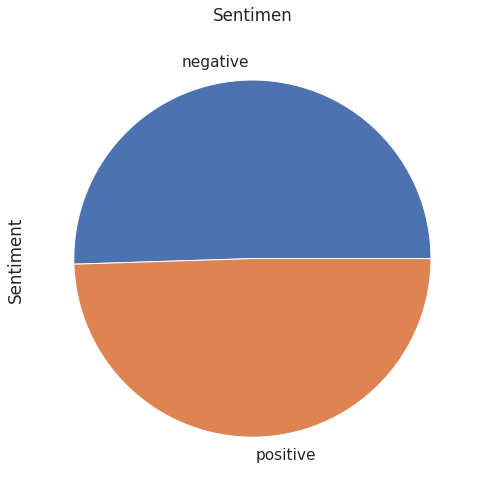

In [ ]:
sns.set(font_scale=1.4)
senti_count.plot(kind='pie', figsize=(8, 10))#, rot=0)
plt.title("Sentimen", y=1.02);

In [ ]:
# Menggunakan one hot encoding untuk merubah kolom sentiment menjadi kategorikal
sentimen = pd.get_dummies(df2.Sentiment,prefix='Sentiment')
df2 = pd.concat([df2,sentimen], axis=1)
df2

,Sentiment,Text Tweet,cleaned_comment,Sentiment_negative,Sentiment_positive
0,negative,Banyak akun kloning seolah2 pendukung #agussil...,banyak akun kloning seolah pendukung agusilvy ...,1,0
1,negative,#agussilvy bicara apa kasihan yaa...lap itu ai...,agusilvy bicara apa kasihan lap itu air matany...,1,0
2,negative,Kalau aku sih gak nunggu hasil akhir QC tp lag...,kalau aku tidak menungu hasil akhir qc tapi la...,1,0
3,negative,Kasian oh kasian dengan peluru 1milyar untuk t...,kasian oh kasian dengan peluru milyar untuk ti...,1,0
4,negative,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,maf pendukung agusilvy hayo dukung aniesandi d...,1,0
...,...,...,...,...,...
2195,positive,Bangga sama suami yg selalu ingat istri disela...,banga sama suami selalu ingat istri disela wak...,0,1
2196,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun pekerjanya penting halal menafkahi kelu...,0,1
2197,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek itu mayoritas peganguran lama tidak kerj...,0,1
2198,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,aslinya cantik ayu mbak karena aku sudah berte...,0,1


In [ ]:
comment_sentimen = df2['cleaned_comment'].values
label = df2[['Sentiment_negative', 'Sentiment_positive']].values

#Data Splitting

In [ ]:
# Membagi data menjadi 80% data train dan 20% data test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(comment_sentimen, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # Mengimport tokenizer untuk preprocessing kata-kata
from tensorflow.keras.preprocessing.sequence import pad_sequences # Mengimport pad_sequences untuk preprocessing kata

# Memasukkan fungsi tokenizer yang didalamnya terdapat parameter untuk menyimpan 6500 kata yang sering muncul
tokenizer = Tokenizer(num_words=6500, oov_token='-')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)

# Memasukkan data train dan test ke dalam sequence
sekuens_latih = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)

# Menggunakan padding agar sequence menjadi sama panjang
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
tokenIndexKata=tokenizer.word_index
print(tokenIndexKata)

{'-': 1, 'tidak': 2, 'ahy': 3, 'saya': 4, 'pilkadadki': 5, 'film': 6, 'saja': 7, 'ahokdjarot': 8, 'jadi': 9, 'ahok': 10, 'sudah': 11, 'orang': 12, 'itu': 13, 'ada': 14, 'dari': 15, 'kalau': 16, 'sama': 17, 'banget': 18, 'untuk': 19, 'face': 20, 'aniesandi': 21, 'dengan': 22, 'tapi': 23, 'lagi': 24, 'bisa': 25, 'anies': 26, 'nonton': 27, 'pak': 28, 'kamu': 29, 'jakarta': 30, 'juga': 31, 'lebih': 32, 'karena': 33, 'daerah': 34, 'pemilihan': 35, 'menang': 36, 'dia': 37, 'kepala': 38, 'apa': 39, 'with': 40, 'indonesia': 41, 'jangan': 42, 'keren': 43, 'banyak': 44, 'pakai': 45, 'ke': 46, 'anak': 47, 'semoga': 48, 'masih': 49, 'hand': 50, 'bukan': 51, 'baik': 52, 'buat': 53, 'dki': 54, 'kita': 55, 'akan': 56, 'baru': 57, 'mata': 58, 'sandi': 59, 'selalu': 60, 'bagus': 61, 'seperti': 62, 'sangat': 63, 'mbak': 64, 'memang': 65, 'pada': 66, 'kalah': 67, 'djarot': 68, 'punya': 69, 'semua': 70, 'bikin': 71, 'suka': 72, 'dalam': 73, 'mereka': 74, 'okeoce': 75, 'aku': 76, 'terus': 77, 'dapat': 78, 

In [ ]:
sampel_data=[' BPJS jetenaga kerjaan skrang pengusaha tdj srius mebdaftar ke BPJS ketenaga kerjaan mkasih pak',
            ' sblm ketuk palu tntang uu cipta kerja,harus di koteksi detel kalau perlu lembar demi lembar demi lembar disut kepublik biar kalau ada mafia uu mencuri menyelipkan tiidakbisa agar Rakyat tidak kecolongan']
tokenizer2 = Tokenizer(num_words=100, oov_token='-')
tokenizer2.fit_on_texts(sampel_data)
tokenIndexKata=tokenizer2.word_index

sekuens_sampel = tokenizer2.texts_to_sequences(sampel_data)

padded_sampel = pad_sequences(sekuens_sampel)

print(tokenIndexKata)
print(sekuens_sampel)
print(padded_sampel)

{'-': 1, 'lembar': 2, 'bpjs': 3, 'kerjaan': 4, 'uu': 5, 'kalau': 6, 'demi': 7, 'jetenaga': 8, 'skrang': 9, 'pengusaha': 10, 'tdj': 11, 'srius': 12, 'mebdaftar': 13, 'ke': 14, 'ketenaga': 15, 'mkasih': 16, 'pak': 17, 'sblm': 18, 'ketuk': 19, 'palu': 20, 'tntang': 21, 'cipta': 22, 'kerja': 23, 'harus': 24, 'di': 25, 'koteksi': 26, 'detel': 27, 'perlu': 28, 'disut': 29, 'kepublik': 30, 'biar': 31, 'ada': 32, 'mafia': 33, 'mencuri': 34, 'menyelipkan': 35, 'tiidakbisa': 36, 'agar': 37, 'rakyat': 38, 'tidak': 39, 'kecolongan': 40}
[[3, 8, 4, 9, 10, 11, 12, 13, 14, 3, 15, 4, 16, 17], [18, 19, 20, 21, 5, 22, 23, 24, 25, 26, 27, 6, 28, 2, 7, 2, 7, 2, 29, 30, 31, 6, 32, 33, 5, 34, 35, 36, 37, 38, 39, 40]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  8  4  9 10 11
  12 13 14  3 15  4 16 17]
 [18 19 20 21  5 22 23 24 25 26 27  6 28  2  7  2  7  2 29 30 31  6 32 33
   5 34 35 36 37 38 39 40]]


#Modeling

In [ ]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 7.5 MB/s 


In [ ]:
import pickle5 as pickle
with open('tokenizer2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Membuat kelas dan fungsi agar proses training berhenti saat akurasi validasi model telah mencapai 92%
class myCallBack(tf.keras.callbacks.Callback):    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.80):
            print("\nAkurasi validasi telah mencapai > 80%!")
            self.model.stop_training = True
myCallBack = myCallBack()

In [ ]:
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

# Fungsi untuk menyimpan model "C:\Users\Alfa\Program Skripsi\kesehatan_fix_blom_fix.csv"
save_direc = os.path.join(os.getcwd(), 'drive/My Drive/Sentimen Analisis/')

model_name = 'geaNlp_weight_model2.h5'
model_name2 = 'geaNlp_weight_model3.h5'

# Membuat directory untuk menyimpan model
if not os.path.isdir(save_direc):
    os.makedirs(save_direc)

# Menggabungkan directory dengan model
modelpath = os.path.join(save_direc, model_name2)

checkpoint = ModelCheckpoint(filepath = modelpath, verbose = 2, monitor='val_accuracy',
                             save_best_only = True, save_weights_only = True)#,save_freq=1)

In [ ]:
from tensorflow.keras import regularizers # Library untuk mencegah overfitting pada model
from tensorflow.keras.optimizers import RMSprop # mengimport optimizer untuk model

# Membuat model Sequential dengan Bidirectional LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(6500, 32), # 6500 input & 32 layer embedding
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)), # 64 layer LSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), # 32 layer LSTM
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'), #kernel_regularizer=regularizers.l2(0.0001),  kernel_regularizer=regularizers.l2(0.001),
    tf.keras.layers.Dropout(0.5), # Menggunakan dropout agar model tidak overfitting
    tf.keras.layers.Dense(2, activation='softmax') # Outputnya adalah 3 dan karena kategorikal menggunakan aktivasi softmax
])

model.summary() # Melihat shape dan parameter model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001),metrics=['accuracy']) # Menggunakan optimizer RMSprop dengan learning rate 0.0001

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          208000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1

In [ ]:
#batch_size = 16
history = model.fit(padded_latih, y_train, validation_data=(padded_test, y_test), epochs=35,#batch_size=1,
                    steps_per_epoch=30,callbacks=[myCallBack, checkpoint],  verbose=2)
#

Epoch 1/35

Epoch 1: val_accuracy improved from -inf to 0.49091, saving model to /content/drive/My Drive/Sentimen Analisis/geaNlp_weight_model3.h5
30/30 - 10s - loss: 0.6932 - accuracy: 0.4926 - val_loss: 0.6929 - val_accuracy: 0.4909 - 10s/epoch - 328ms/step
Epoch 2/35

Epoch 2: val_accuracy did not improve from 0.49091
30/30 - 1s - loss: 0.6928 - accuracy: 0.5063 - val_loss: 0.6927 - val_accuracy: 0.4886 - 1s/epoch - 42ms/step
Epoch 3/35

Epoch 3: val_accuracy improved from 0.49091 to 0.56818, saving model to /content/drive/My Drive/Sentimen Analisis/geaNlp_weight_model3.h5
30/30 - 1s - loss: 0.6920 - accuracy: 0.5227 - val_loss: 0.6920 - val_accuracy: 0.5682 - 1s/epoch - 41ms/step
Epoch 4/35

Epoch 4: val_accuracy improved from 0.56818 to 0.58182, saving model to /content/drive/My Drive/Sentimen Analisis/geaNlp_weight_model3.h5
30/30 - 1s - loss: 0.6910 - accuracy: 0.5744 - val_loss: 0.6910 - val_accuracy: 0.5818 - 1s/epoch - 39ms/step
Epoch 5/35

Epoch 5: val_accuracy improved from

In [ ]:
# Save model yang telah dijalankan
#model.save("lstmModel1.h5")

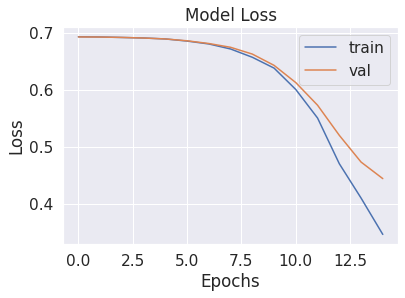

In [ ]:
# Menampilkan plot loss dari model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

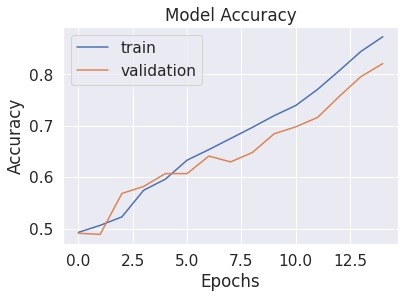

In [ ]:
# Menampilkan plot akurasi dari model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

#Model Evaluation

In [ ]:
loss, acc = model.evaluate(padded_test, y_test, verbose=1)
                            #batch_size=batch_size)
print("loss:", loss)
print("Validation accuracy:", acc)

14/14 [==============================] - 0s 10ms/step - loss: 0.4441 - accuracy: 0.8205
loss: 0.44412413239479065
Validation accuracy: 0.8204545378684998


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
def model_evaluate(): 
    # predict class with test set
    predict_x=model.predict(padded_test) 
    y_pred_test=np.argmax(predict_x,axis=1)
    #y_pred_test =  model.predict_classes(padded_test, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

Accuracy:	82.0%


              precision    recall  f1-score   support

           0       0.83      0.80      0.81       215
           1       0.81      0.84      0.83       225

    accuracy                           0.82       440
   macro avg       0.82      0.82      0.82       440
weighted avg       0.82      0.82      0.82       440



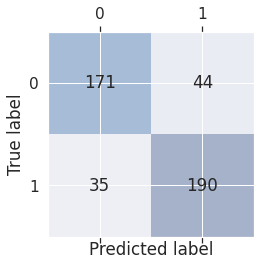

In [ ]:
model_evaluate()

In [ ]:
yt = df1['cleaned_comment']
print(yt)
#vectorizing the comment  by the pre-fitted tokenizer instance
yt = tokenizer.texts_to_sequences(yt)
#padding the comment to have exactly the same shape as `embedding_2` input
yt = pad_sequences(yt, maxlen=29, dtype='int32', value=0)
#print(twt)
sentiment = model.predict(yt)[0]
if(np.argmax(sentiment) == 0):
    print('Sentimen: Negatif')
elif (np.argmax(sentiment) == 1):
    print('Sentimen: Netral')
else :
    print('Sentimen: Positif')
print(sentiment)


0      ud pasal perekonomian disusun usaha azas kekel...
1                                        negara mk kuasa
2        dimana pancasilais mk keadilan rakyat indonesia
3                              mk mendukung rakyat buruh
4                              u ciptaker sesuai dngan u
                             ...                        
687                                coba dunia uang ribut
688    toto statement asing kayak jargon beli daging ...
689    hidup buruh buruh melawan buruh dijajah pengus...
690    yoga kuli serabutan kerja pabrik mensukuri kay...
691    kang toto suruh pindah ganti kewarganegaran in...
Name: cleaned_comment, Length: 692, dtype: object
Sentimen: Negatif
[0.58264166 0.41735837]


In [ ]:
def convert(text):
  yt = [text]
  yt = tokenizer.texts_to_sequences(yt)
  yt = pad_sequences(yt, maxlen=29, dtype='int32', value=0)
  sentiment = model.predict(yt)[0]
  if(np.argmax(sentiment) == 0):
      return 'Negatif'
  else :
     return 'Positif'
  

#Sebelum Pengesahan

In [ ]:
data_sebelum = df3
data_sebelum

,Comment,cleaned_comment
0,Maksdxa BPJS jetenaga kerjaan skrang pengusaha...,maksdxa bpjs jetenaga kerjan skrang pengusaha ...
1,Bahkan sekarang kainbpengusaha. TDK mendaftar...,kainbpengusaha mendaftarkan bpjs ketenga jerjan
2,Pemberian THR tlong di awasi pak maksih,pemberian thr tlong awasi maksih
3,Kami usul pak penfawasan pemberian upah dan...,usul penfawasan pemberian upah the tiao propin...
4,Ump naik engga ada 1% sehat boss,ump sehat bos
...,...,...
12991,Waalaikum salam pak\n\nOhya semalam ke kaliman...,walaikum salam pakohya semalam kalimantan
12992,"Soalnya di Kalimantan banyak bebek,di Jakarta ...",kalimantan bebek jakarta bebekmakanya sikodok ...
12993,@Sunarno Sunarno anak SD juga bisa baca tek,sunarno anak baca tek
12994,Kamu cari saja Dul,cari dul


In [ ]:
data_sebelum['Hasil Sentimen'] = data_sebelum['cleaned_comment'].apply(lambda x: convert(x))

In [ ]:
data_sebelum

,Comment,cleaned_comment,Hasil Sentimen
0,Maksdxa BPJS jetenaga kerjaan skrang pengusaha...,maksdxa bpjs jetenaga kerjan skrang pengusaha ...,Negatif
1,Bahkan sekarang kainbpengusaha. TDK mendaftar...,kainbpengusaha mendaftarkan bpjs ketenga jerjan,Negatif
2,Pemberian THR tlong di awasi pak maksih,pemberian thr tlong awasi maksih,Negatif
3,Kami usul pak penfawasan pemberian upah dan...,usul penfawasan pemberian upah the tiao propin...,Positif
4,Ump naik engga ada 1% sehat boss,ump sehat bos,Positif
...,...,...,...
12991,Waalaikum salam pak\n\nOhya semalam ke kaliman...,walaikum salam pakohya semalam kalimantan,Positif
12992,"Soalnya di Kalimantan banyak bebek,di Jakarta ...",kalimantan bebek jakarta bebekmakanya sikodok ...,Positif
12993,@Sunarno Sunarno anak SD juga bisa baca tek,sunarno anak baca tek,Negatif
12994,Kamu cari saja Dul,cari dul,Negatif


**Wordcould Sebelum**

In [ ]:
import matplotlib.pyplot
import seaborn as sns

comment_words=''

for val in data_sebelum.cleaned_comment:  
    # merubah val menjadi string
    val = str(val)
  
    # memisahkan variabel val per kata
    tokens = val.split() 
      
    # Mengonversi variabel val menjadi huruf kecil
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

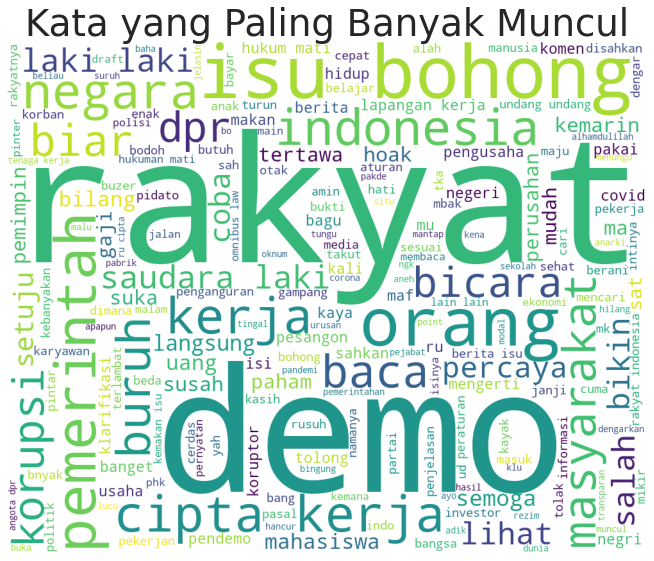

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud1 = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.title("Kata yang Paling Banyak Muncul", fontsize = 37)
plt.tight_layout(pad = 1) 
  
plt.show() 

Visualisasi Sentimen

In [ ]:
senti_count = data_sebelum['Hasil Sentimen'].value_counts()
print(type(senti_count))
print(senti_count)

<class 'pandas.core.series.Series'>
Negatif    8252
Positif    4744
Name: Hasil Sentimen, dtype: int64


In [ ]:
senti_count2=list(zip(str(senti_count),str(senti_count.index)))
senti_count2=tuple(zip(senti_count,senti_count.index))
kolom=[(sub[1], sub[0]) for sub in senti_count2]
kolom

[('Negatif', 8252), ('Positif', 4744)]

In [ ]:
labels=[]
values=[]
for row in kolom:
    labels.append(row[0])
    values.append(row[1])
print(labels)
print(values)

['Negatif', 'Positif']
[8252, 4744]


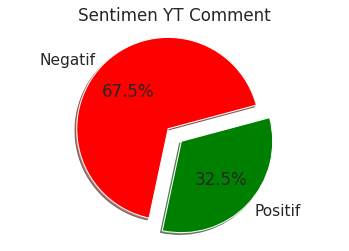

In [ ]:
my_labels = 'Negatif','Positif'
my_colors = ['red','green']
my_explode = (0.1, 0.1)
plt.pie(senti_count, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Sentimen YT Comment')
plt.axis('equal')
plt.show()

In [ ]:
data_sebelum.to_excel('data_sebelum_fix.xlsx')

#Sesudah pengesahan

In [ ]:
data_sesudah = df1
data_sesudah

,cleaned_comment
0,ud pasal perekonomian disusun usaha azas kekel...
1,negara mk kuasa
2,dimana pancasilais mk keadilan rakyat indonesia
3,mk mendukung rakyat buruh
4,u ciptaker sesuai dngan u
...,...
687,coba dunia uang ribut
688,toto statement asing kayak jargon beli daging ...
689,hidup buruh buruh melawan buruh dijajah pengus...
690,yoga kuli serabutan kerja pabrik mensukuri kay...


In [ ]:
data_sesudah['Hasil Sentimen'] = data_sesudah['cleaned_comment'].apply(lambda x: convert(x))

In [ ]:
data_sesudah

,cleaned_comment,Hasil Sentimen
0,ud pasal perekonomian disusun usaha azas kekel...,Negatif
1,negara mk kuasa,Negatif
2,dimana pancasilais mk keadilan rakyat indonesia,Positif
3,mk mendukung rakyat buruh,Positif
4,u ciptaker sesuai dngan u,Negatif
...,...,...
687,coba dunia uang ribut,Negatif
688,toto statement asing kayak jargon beli daging ...,Negatif
689,hidup buruh buruh melawan buruh dijajah pengus...,Positif
690,yoga kuli serabutan kerja pabrik mensukuri kay...,Negatif


**wordcolud sesudah**

In [ ]:
import matplotlib.pyplot
import seaborn as sns
comment_words=''

for val in data_sesudah.cleaned_comment:  
    # merubah val menjadi string
    val = str(val)
  
    # memisahkan variabel val per kata
    tokens = val.split() 
      
    # Mengonversi variabel val menjadi huruf kecil
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

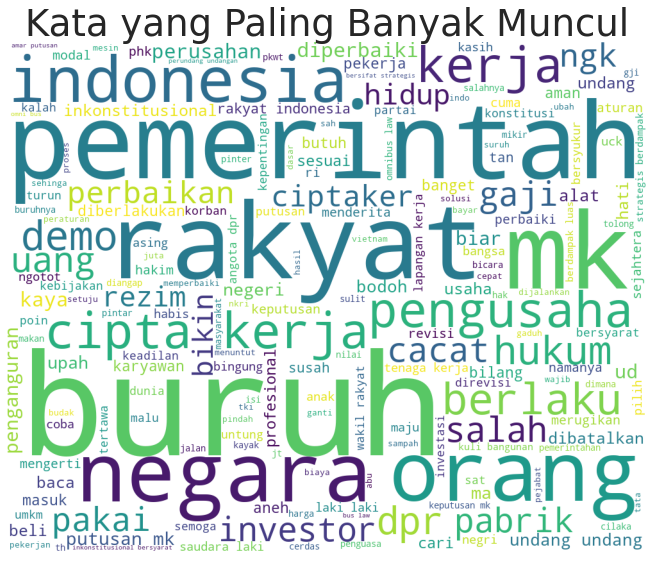

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud1 = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.title("Kata yang Paling Banyak Muncul", fontsize = 37)
plt.tight_layout(pad = 1) 
  
plt.show() 

**Visualisasi Sntimen**



In [ ]:
senti_count = data_sesudah['Hasil Sentimen'].value_counts()
print(type(senti_count))
print(senti_count)

<class 'pandas.core.series.Series'>
Negatif    467
Positif    225
Name: Hasil Sentimen, dtype: int64


In [ ]:
senti_count2=list(zip(str(senti_count),str(senti_count.index)))
senti_count2=tuple(zip(senti_count,senti_count.index))
kolom=[(sub[1], sub[0]) for sub in senti_count2]
kolom

[('Negatif', 467), ('Positif', 225)]

In [ ]:
labels=[]
values=[]
for row in kolom:
    labels.append(row[0])
    values.append(row[1])
print(labels)
print(values)

['Negatif', 'Positif']
[467, 225]


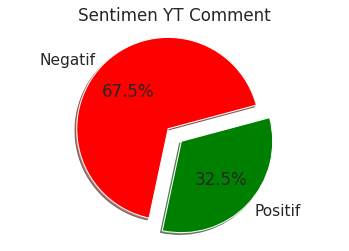

In [ ]:
my_labels = 'Negatif','Positif'
my_colors = ['red','green']
my_explode = (0.1, 0.1)
plt.pie(senti_count, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Sentimen YT Comment')
plt.axis('equal')
plt.show()

In [ ]:
data_sesudah.to_excel('data_sesudah_fix.xlsx')

#Testing New import model

In [ ]:
#new model 
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('BestModel.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          144000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # Mengimport tokenizer untuk preprocessing kata-kata
from tensorflow.keras.preprocessing.sequence import pad_sequences # Mengimport pad_sequences untuk preprocessing kata
import pickle5 as pickle
import numpy as np

In [ ]:
tokenizer = Tokenizer(num_words=4500, oov_token='-')

In [ ]:
# Memasukkan fungsi tokenizer yang didalamnya terdapat parameter untuk menyimpan 4500 kata yang sering muncul
# with open('tokenizer2.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

# pickle_in = open("tokenizer2.pickle","rb")
# token2 = pickle.load(pickle_in)

token3 = pickle.load(open("tokenizer2.pickle", 'rb'))

In [ ]:
print(token3)

In [ ]:
def convert(text):
  yt = [text]
  yt = token3.texts_to_sequences(yt)
  yt = pad_sequences(yt, maxlen=29, dtype='int32', value=0)
  sentiment = new_model.predict(yt)
  if(np.argmax(sentiment) == 0):
      return 'Negatif'
  else :
     return 'Positif'

In [ ]:
data_sesudah['Hasil Sentimen'] = data_sesudah['cleaned_comment'].apply(lambda x: convert(x))

In [ ]:
data_sesudah

,cleaned_comment,Hasil Sentimen
0,ud pasal perekonomian disusun usaha azas kekel...,Negatif
1,negara mk kuasa,Negatif
2,dimana pancasilais mk keadilan rakyat indonesia,Negatif
3,mk mendukung rakyat buruh,Negatif
4,u ciptaker sesuai dngan u,Negatif
...,...,...
687,coba dunia uang ribut,Negatif
688,toto statement asing kayak jargon beli daging ...,Negatif
689,hidup buruh buruh melawan buruh dijajah pengus...,Negatif
690,yoga kuli serabutan kerja pabrik mensukuri kay...,Negatif


In [ ]:
senti_count = data_sesudah['Hasil Sentimen'].value_counts()
print(type(senti_count))
print(senti_count)

<class 'pandas.core.series.Series'>
Negatif    692
Name: Hasil Sentimen, dtype: int64


In [ ]:
data_sesudah.pop('Hasil Sentimen')

0      Negatif
1      Negatif
2      Negatif
3      Negatif
4      Negatif
        ...   
687    Negatif
688    Negatif
689    Negatif
690    Negatif
691    Negatif
Name: Hasil Sentimen, Length: 692, dtype: object

In [ ]:
data_sesudah.to_csv('data_test.csv')